## Setup

In [1]:
import torchvision
import torch
import pandas as pd

import matplotlib.pyplot as plt

from dcai.validation import ScoreTracker
from dcai.dataset import TrainDataset, ValidationDataset
from typing import List

In [2]:
# Start a score tracker to track score as function of the number of annotations bought
score_tracker = ScoreTracker(team_name="marcel-brute-force")

# Get a MNIST train data set
train_dataset = TrainDataset()

## Example of buying an annotation

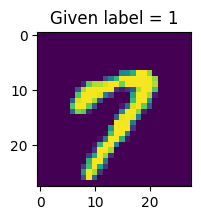

In [3]:
plt.figure(figsize=(2,2))
plt.title(f"Given label = {train_dataset[15][1]}")
plt.imshow(train_dataset[15][0]);

In [4]:
# Buy an annotation
train_dataset.buy_annotation(15)

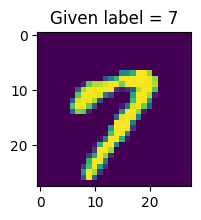

In [5]:
plt.figure(figsize=(2,2))
plt.title(f"Given label = {train_dataset[15][1]}")
plt.imshow(train_dataset[15][0]);

## Train with the current data set

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/marcelraas/PycharmProjects/data-centric-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

/Users/marcelraas/PycharmProjects/data-centric-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/traine
r/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers
which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number
of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

/Users/marcelraas/PycharmProjects/data-centric-hackathon/venv/lib/python3.10/site-packages/torchmetrics/functional/
classification/stat_scores.py:416: UserWarning: MPS: no support for int64 reduction ops, casting it to int32 
(Triggered internally at 
/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/ReduceOps.mm:144.)
  fp = confmat.sum(0) - tp

/Users/marcelraas/PycharmProjects/data-centric-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/traine
r/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many 
workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is 
the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

`Trainer.fit` stopped: `max_epochs=1` reached.


Attempt(n_annotations_bought=1, precision_class_1=0.50858176, recall_class_1=0.9920705, precision_class_7=0.0, recall_class_7=0.0)

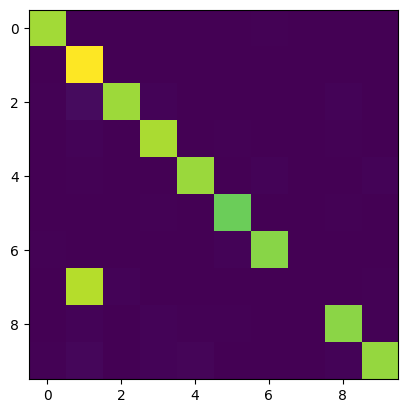

In [6]:
score_tracker.train_and_validate_model(train_dataset, plot_confusion_matrix=True)

## Randomly annotate and measure performance as we go

In [7]:
def iterate_in_batches(it: List, batch_size: int):
    i=0
    while True:
        ret = it[i:i+batch_size]
        if len(ret) == 0:
            return
        yield ret
        i += batch_size

In [8]:
labels = pd.Series(train_dataset.labels)
labels_1 = labels[labels == 1]
train_dataset.exclude_datapoints(labels_1.index)

In [9]:
for batch in iterate_in_batches(labels_1, 2048):
    for el in batch.index:
        train_dataset.buy_annotation(el)
    train_dataset.include_datapoints(batch.index)
        
    score_tracker.train_and_validate_model(train_dataset, plot_confusion_matrix=False)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


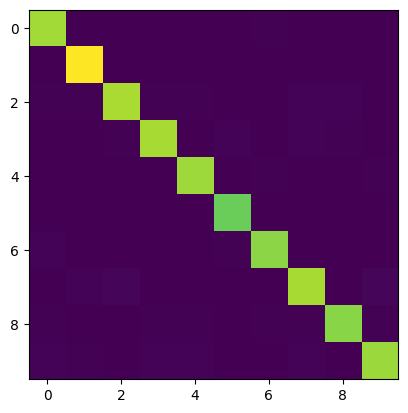

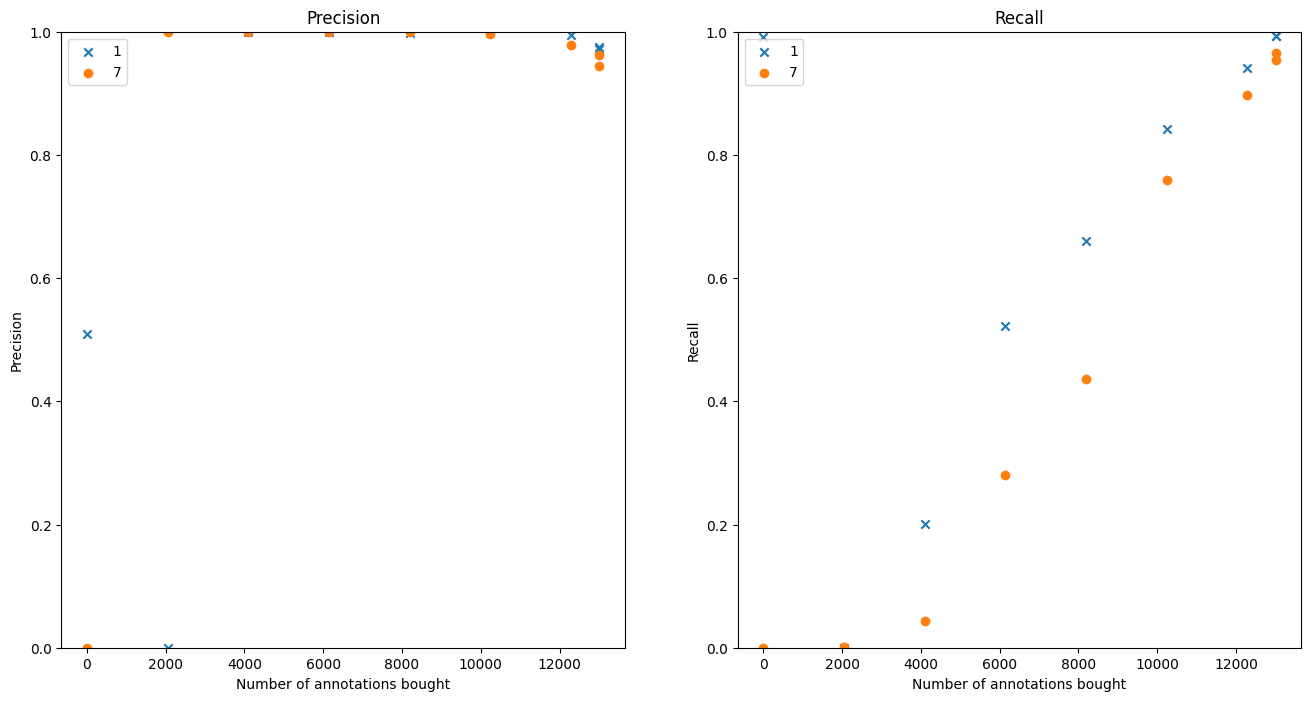

In [10]:
score_tracker.train_and_validate_model(train_dataset, plot_confusion_matrix=True)
score_tracker.plot_scores()